# HD3167

**Note:** I think there might be multiple planets in this dataset

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import lightkurve as lk
from glob import glob
import ombre as om
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
from astropy.io import fits
import astropy.units as u

In [3]:
name = 'HD3167'

In [4]:
fnames = np.asarray(glob(f'/Volumes/Nibelheim/hst/data/{name}/*.fits'))

In [5]:
obs = om.Observation.from_files(fnames)

In [6]:
clc = lk.search_lightcurve(name, mission='K2', author='K2SFF').download()
clc.flux = clc.flux.value * u.electron/u.s
clc.flux_err = clc.flux_err.value * u.electron/u.s
clc = clc.flatten(51)
clc = clc[clc.flux.value > 0.97]
clc = clc.remove_outliers(sigma_upper=3, sigma_lower=1e2)

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

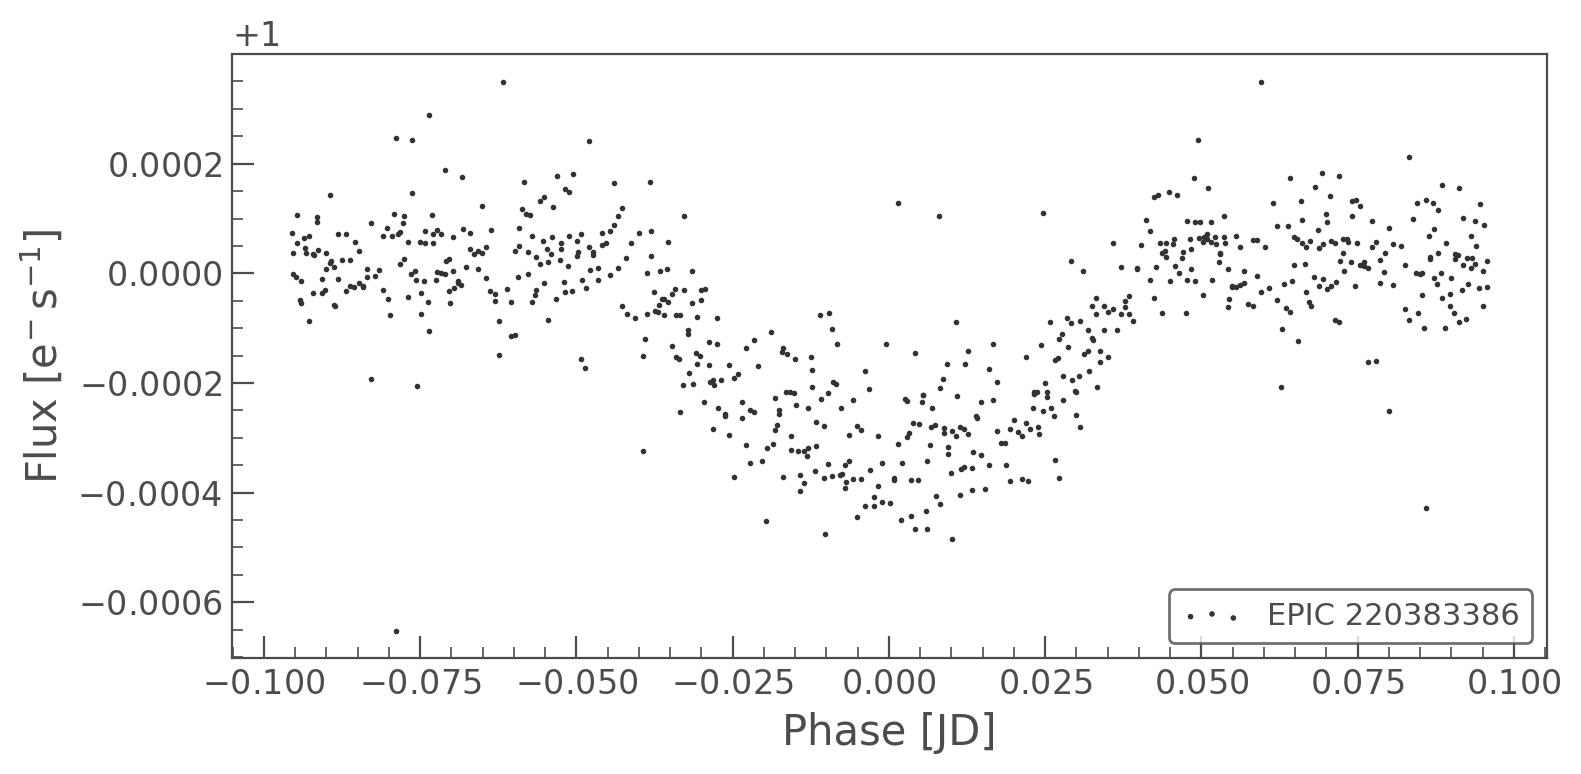

In [7]:
k = np.abs(((clc.time.value - (obs.t0 - 2454833 + obs.period/2))/obs.period) % 1 - 0.5) < 0.1
clc[k].fold(obs.period, obs.t0 - 2454833).scatter()

In [8]:
obs.fit_transit(x_suppl=clc.time.value[k] + 2454833,
                y_suppl=clc.flux.value[k],
                yerr_suppl=clc.flux_err.value[k],
                exptime_suppl=np.median(np.diff(clc.time.value)), fit_t0=True, fit_period=True, fit_inc=True)

<AxesSubplot:xlabel='Phase', ylabel='$e^-s^{-1}$'>

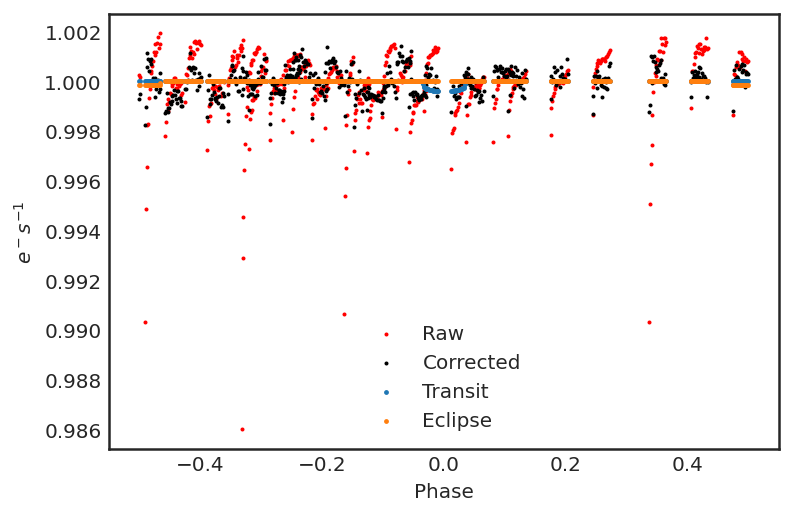

In [9]:
obs.plot()

In [10]:
obs.fit_model()

Fitting Transit/Eclipse Model:   0%|          | 0/8 [00:00<?, ?it/s]

Fitting Transit/Eclipse Model:  12%|█▎        | 1/8 [00:47<05:29, 47.09s/it]

Fitting Transit/Eclipse Model:  25%|██▌       | 2/8 [01:25<04:13, 42.24s/it]

Fitting Transit/Eclipse Model:  38%|███▊      | 3/8 [02:08<03:31, 42.34s/it]

Fitting Transit/Eclipse Model:  50%|█████     | 4/8 [02:45<02:41, 40.35s/it]

Fitting Transit/Eclipse Model:  62%|██████▎   | 5/8 [03:28<02:03, 41.18s/it]

Fitting Transit/Eclipse Model:  75%|███████▌  | 6/8 [04:05<01:19, 39.75s/it]

Fitting Transit/Eclipse Model:  88%|████████▊ | 7/8 [04:48<00:40, 40.95s/it]

Fitting Transit/Eclipse Model: 100%|██████████| 8/8 [05:25<00:00, 39.64s/it]

Fitting Transit/Eclipse Model: 100%|██████████| 8/8 [05:25<00:00, 40.70s/it]

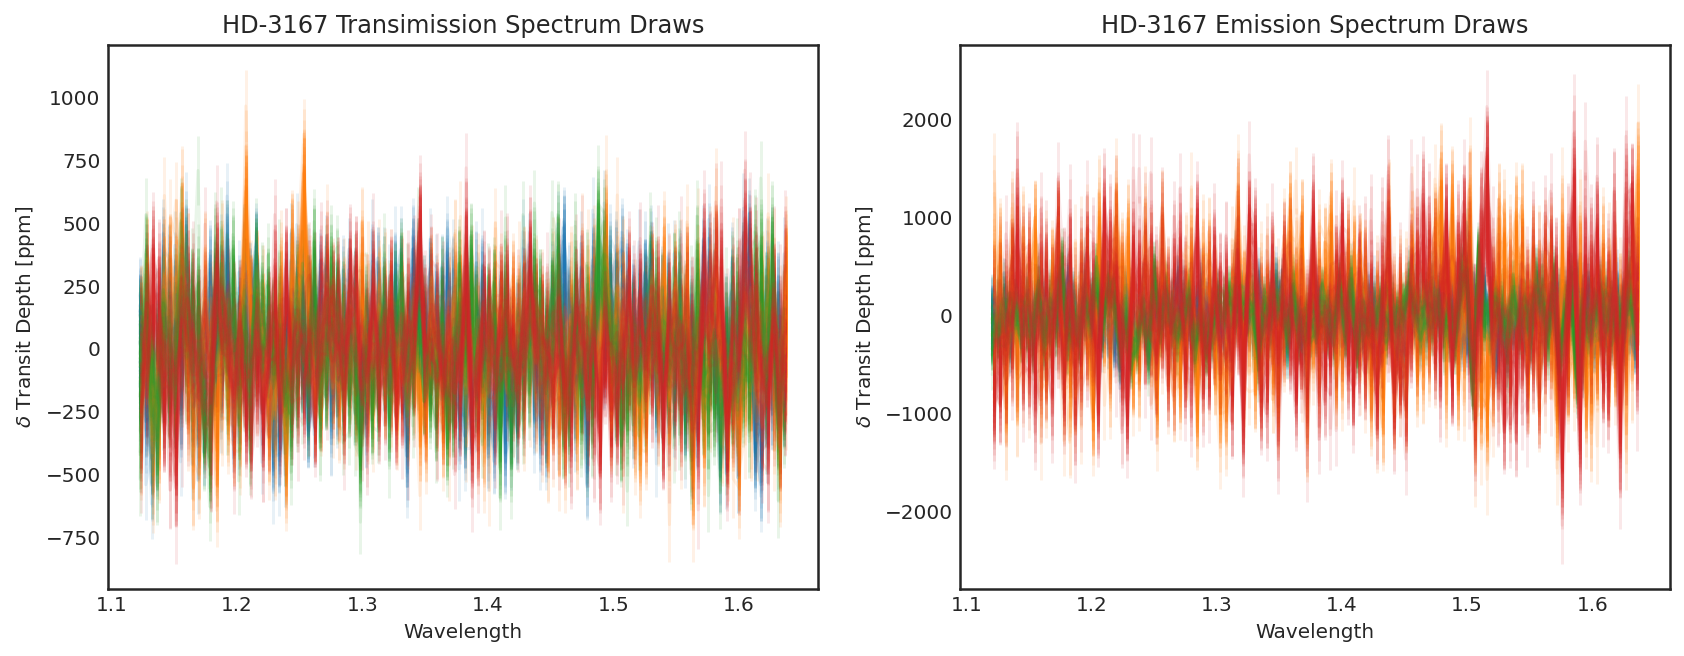

In [11]:
obs.plot_spectra()

<AxesSubplot:title={'center':'HD-3167 Transmission Spectrum, Visit: 4'}, xlabel='Wavelength', ylabel='$\\delta$ Transit Depth [ppm]'>

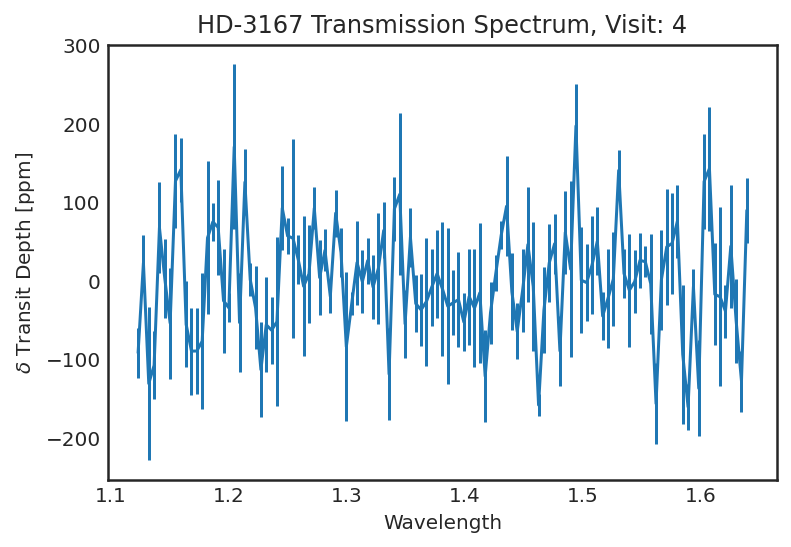

In [12]:
om.Spectra([visit.transmission_spectrum for visit in obs if visit.transmission_spectrum.spec.sum() != 0]).flatten().bin(bins=np.linspace(0.8, 1.7, 200)).plot()

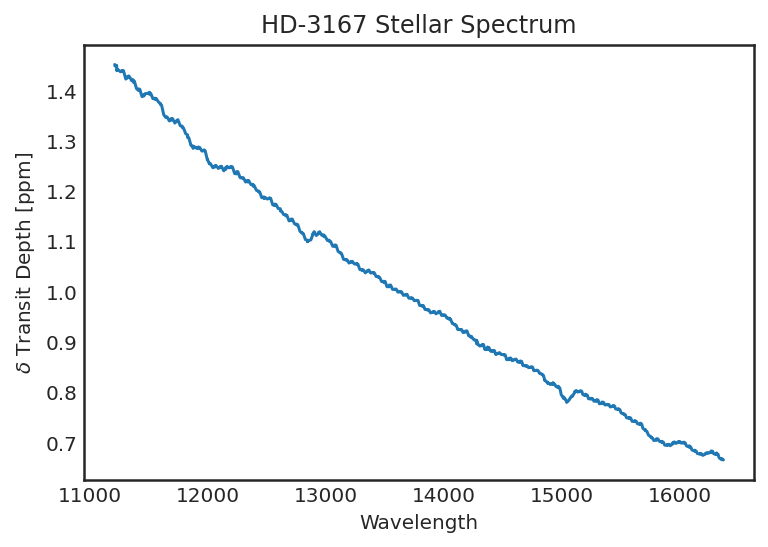

In [13]:
spec = obs.stellar_spectra
spec.plot()
spec.hdulist.writeto(f'results/{name}_stellar_spectrum.fits', overwrite=True)

In [14]:
from astropy.io import fits
try:
    hdulist = om.Spectra([visit.transmission_spectrum for visit in obs if visit.transmission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_transmission.fits', overwrite=True)
except:
    pass
try:    
    hdulist = om.Spectra([visit.emission_spectrum for visit in obs if visit.emission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_emission.fits', overwrite=True)
except:
    pass

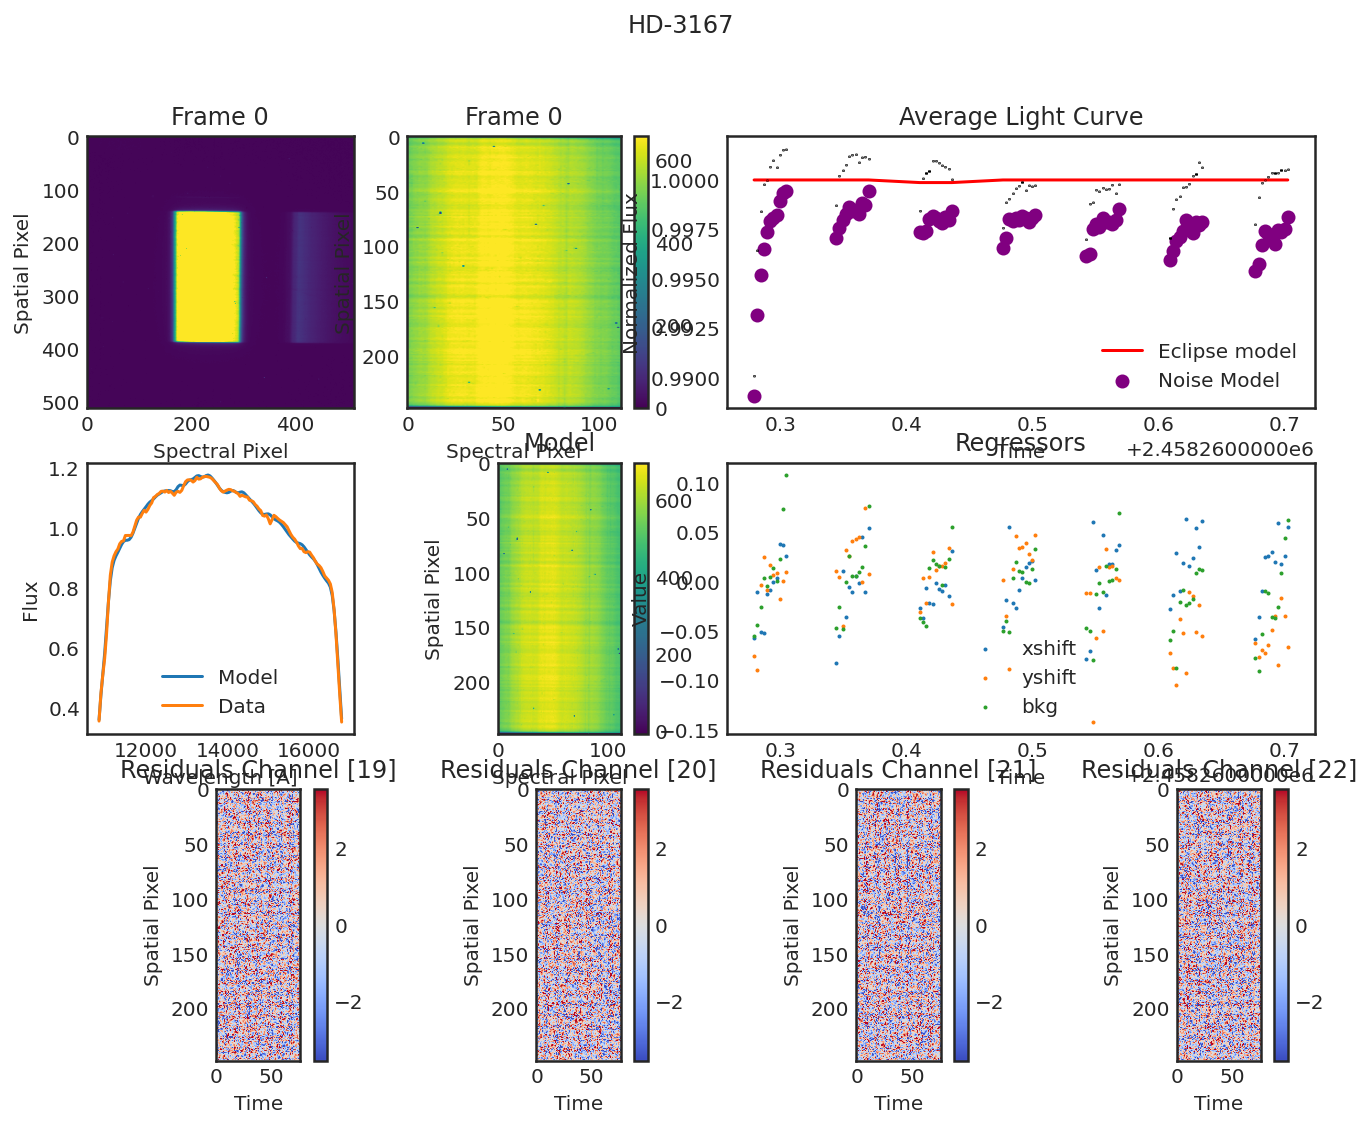

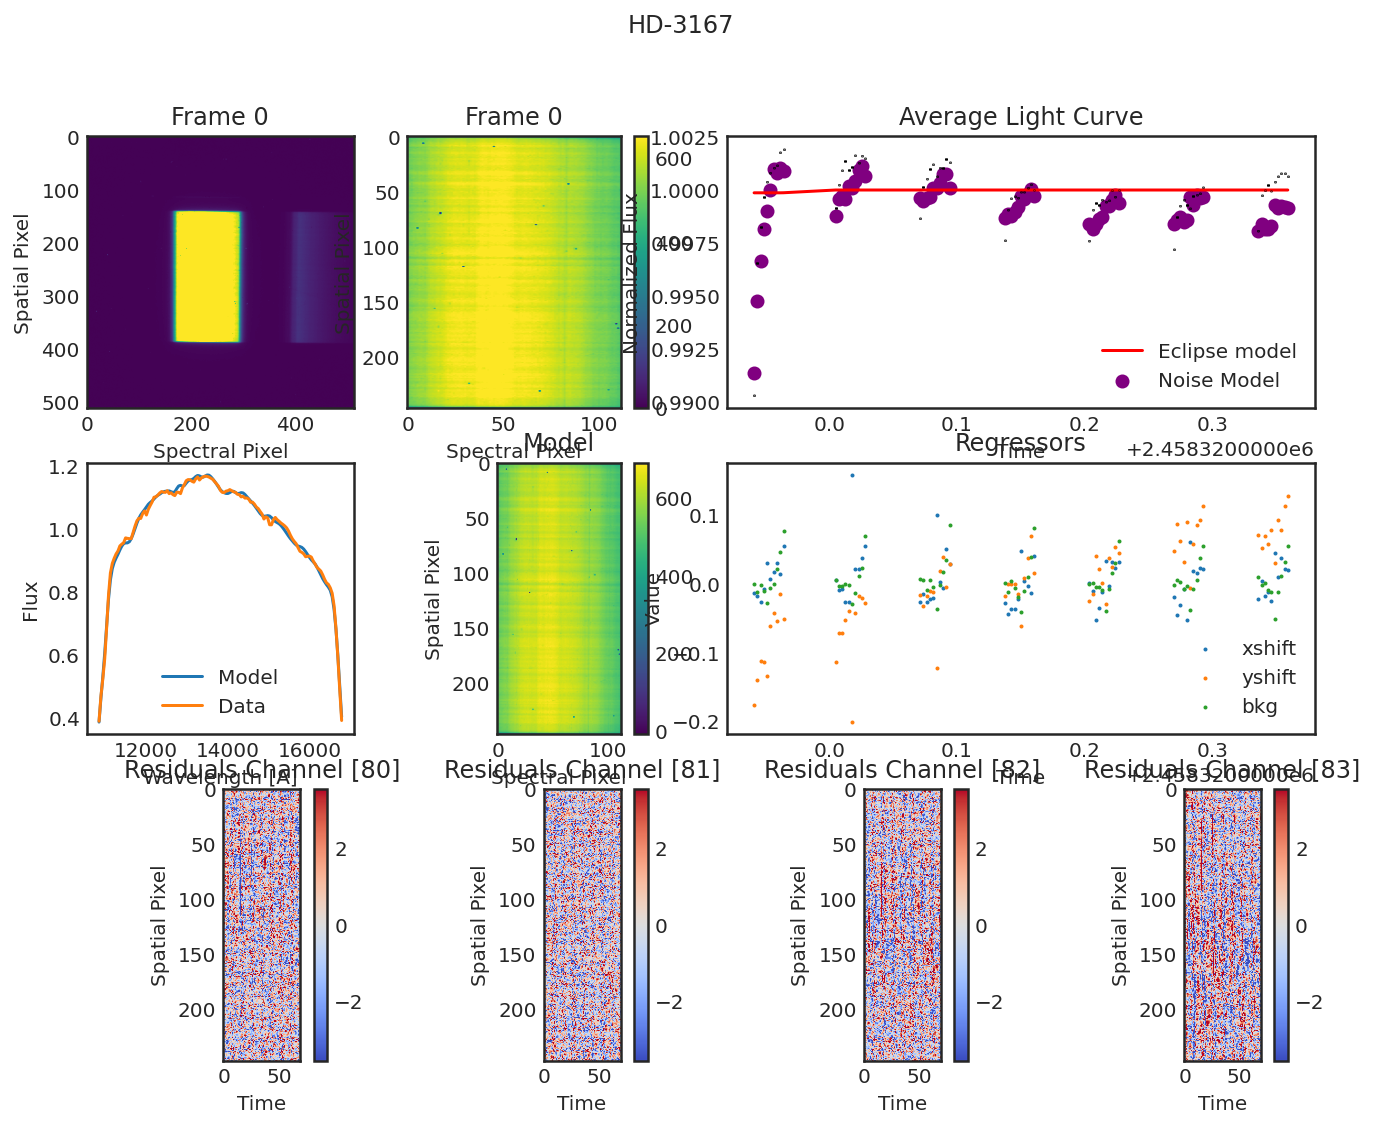

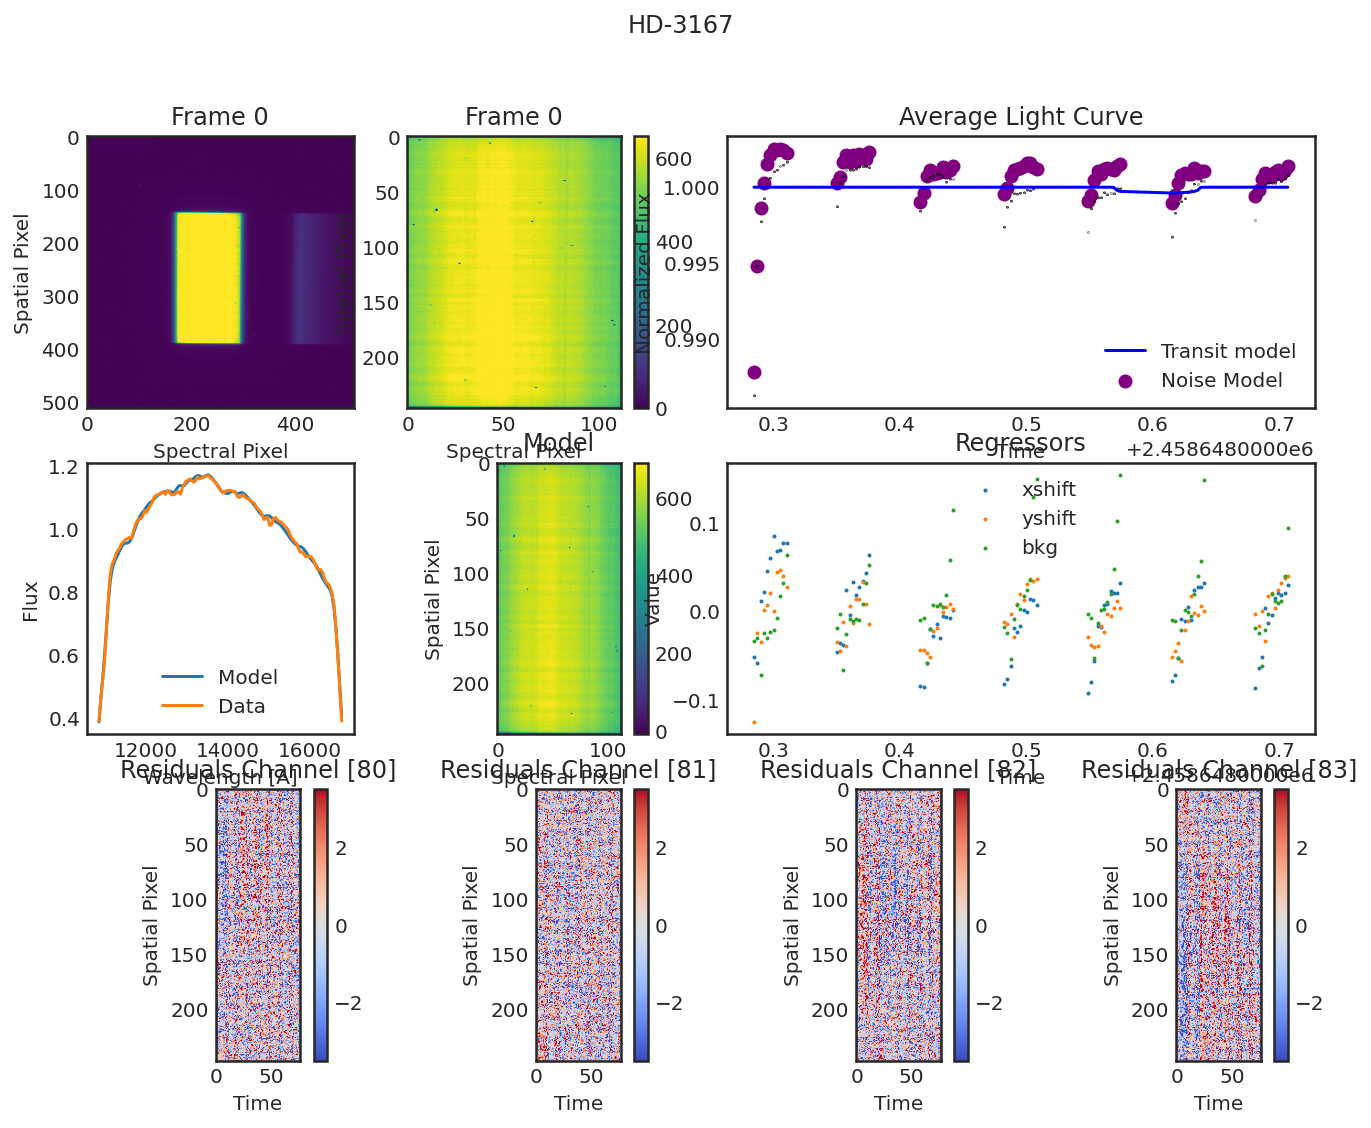

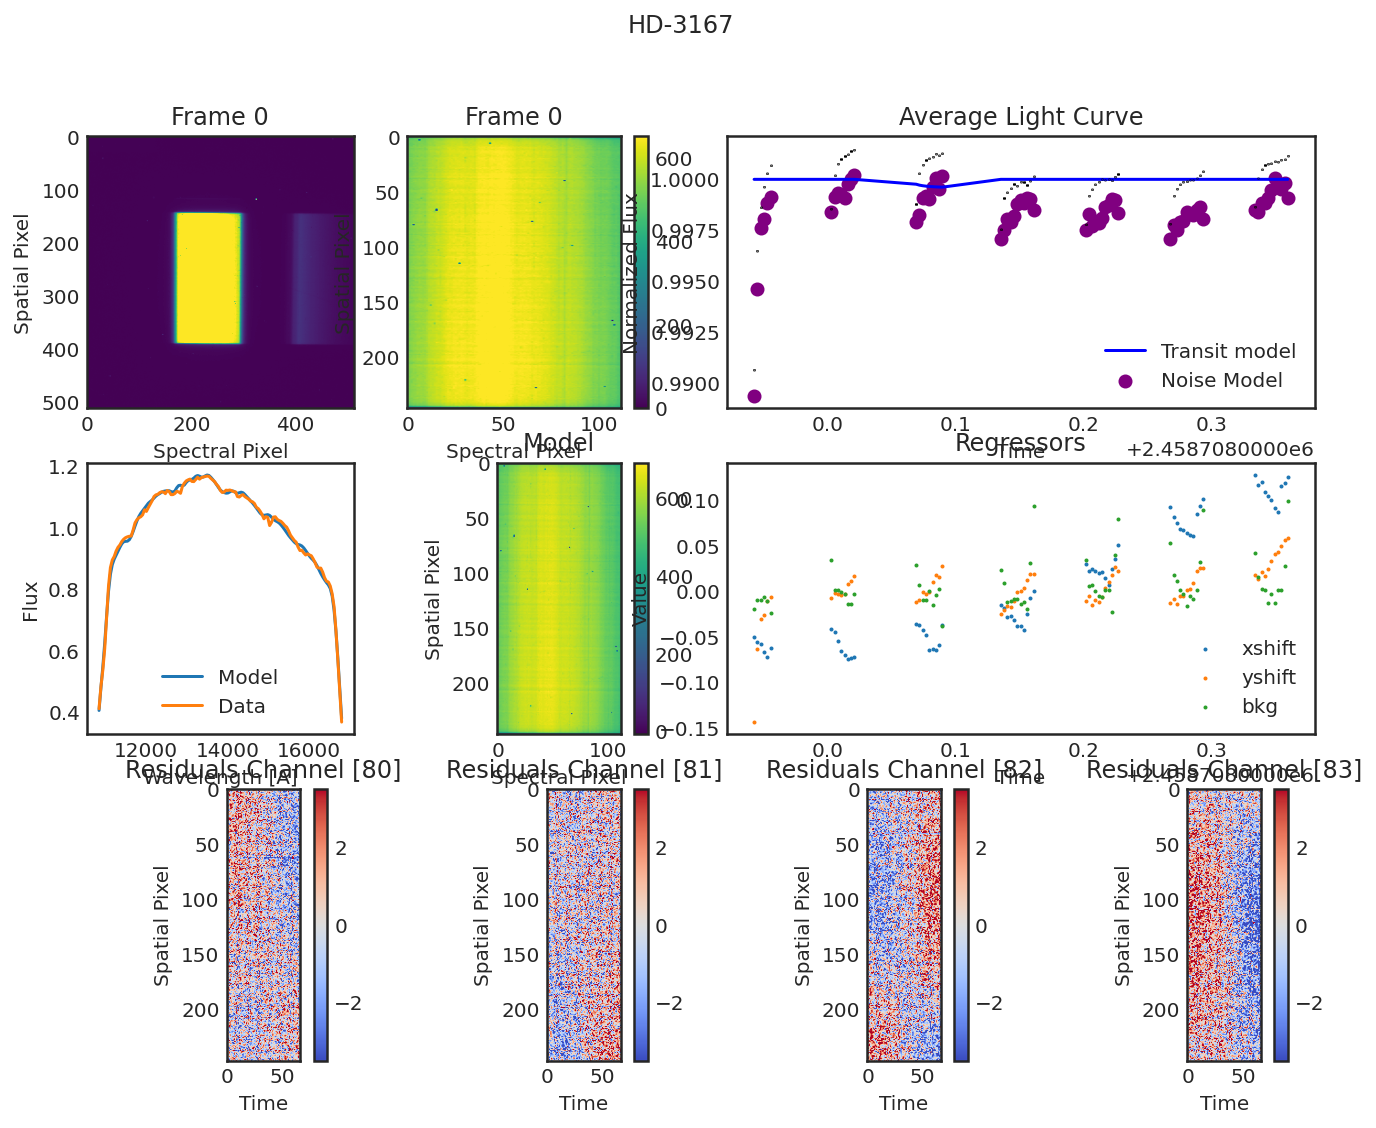

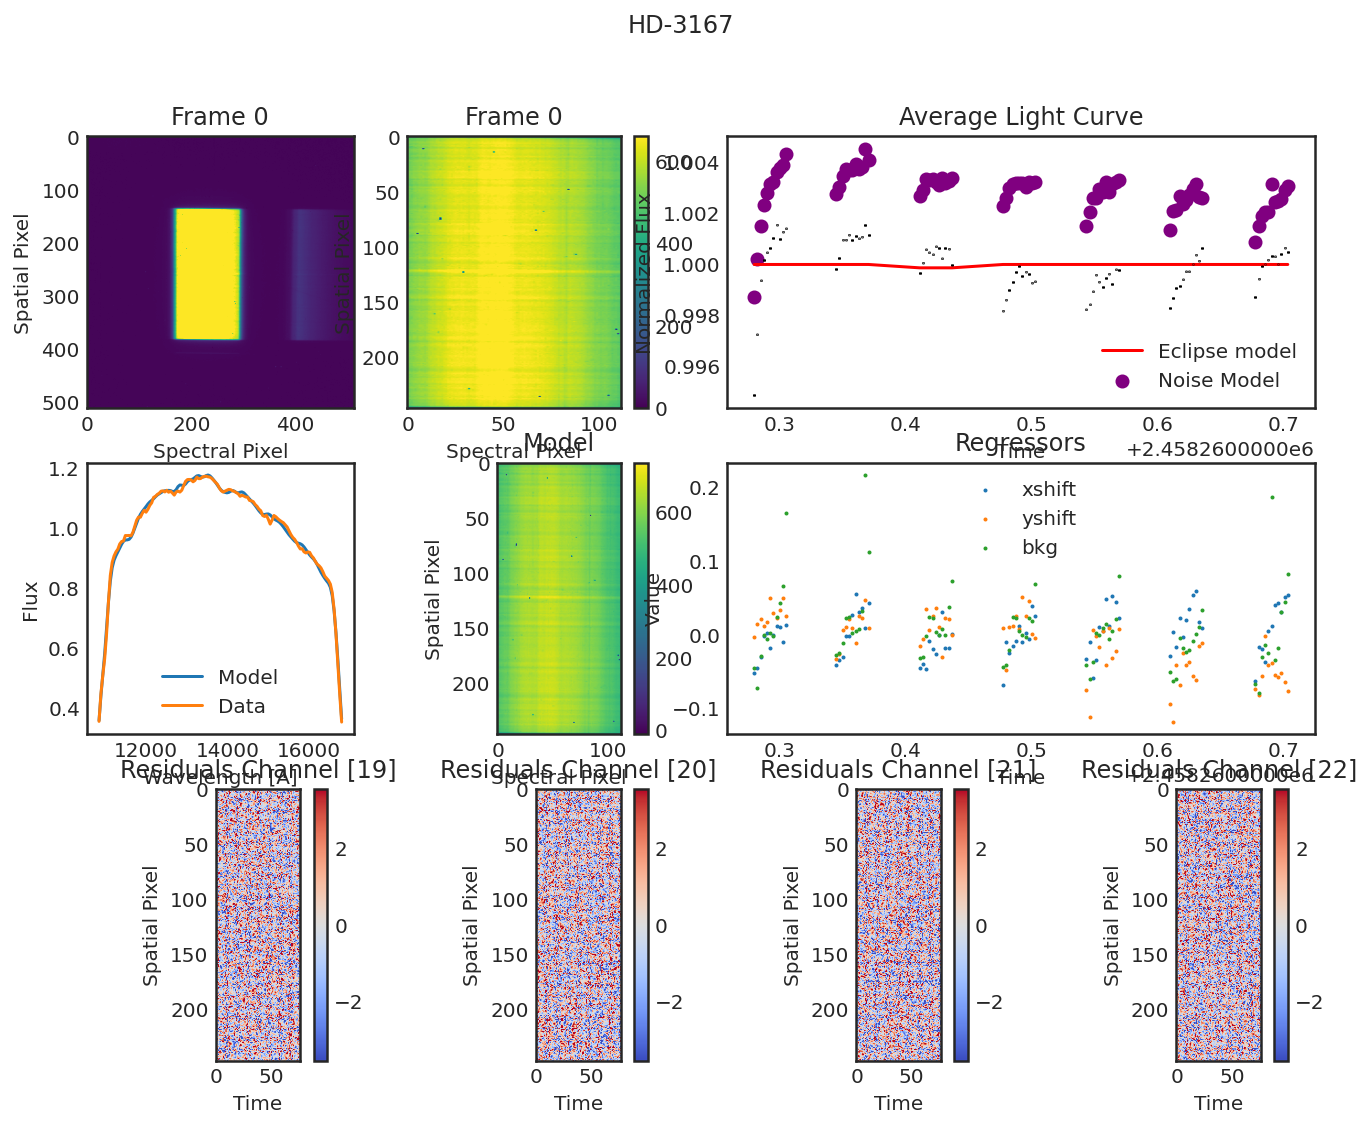

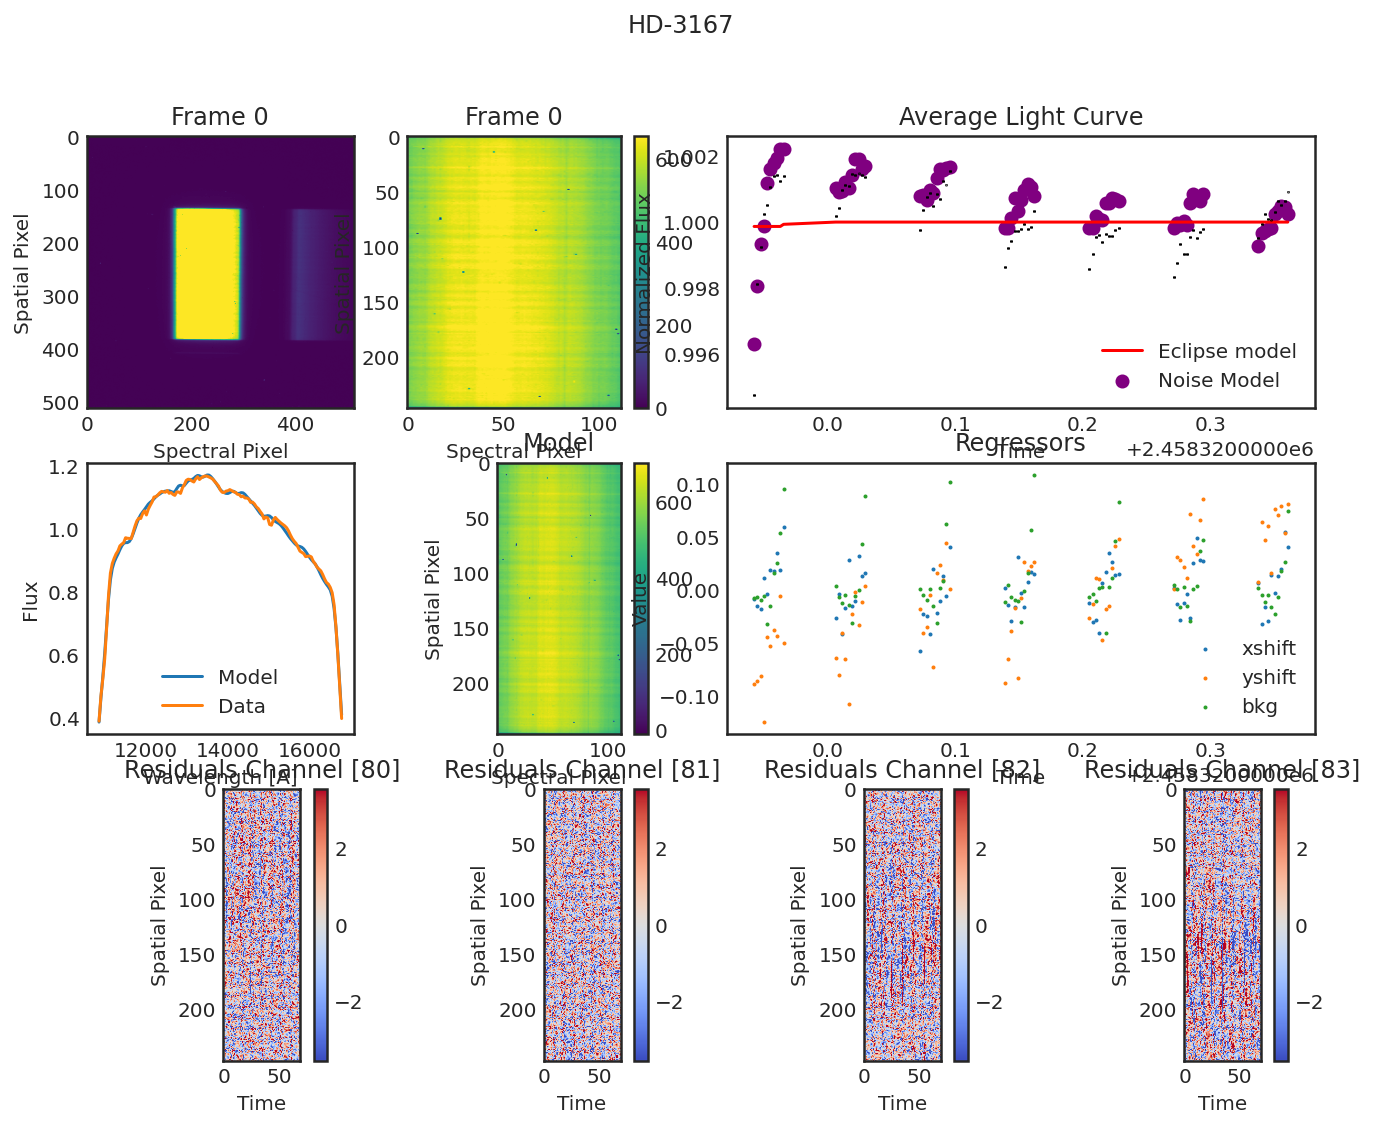

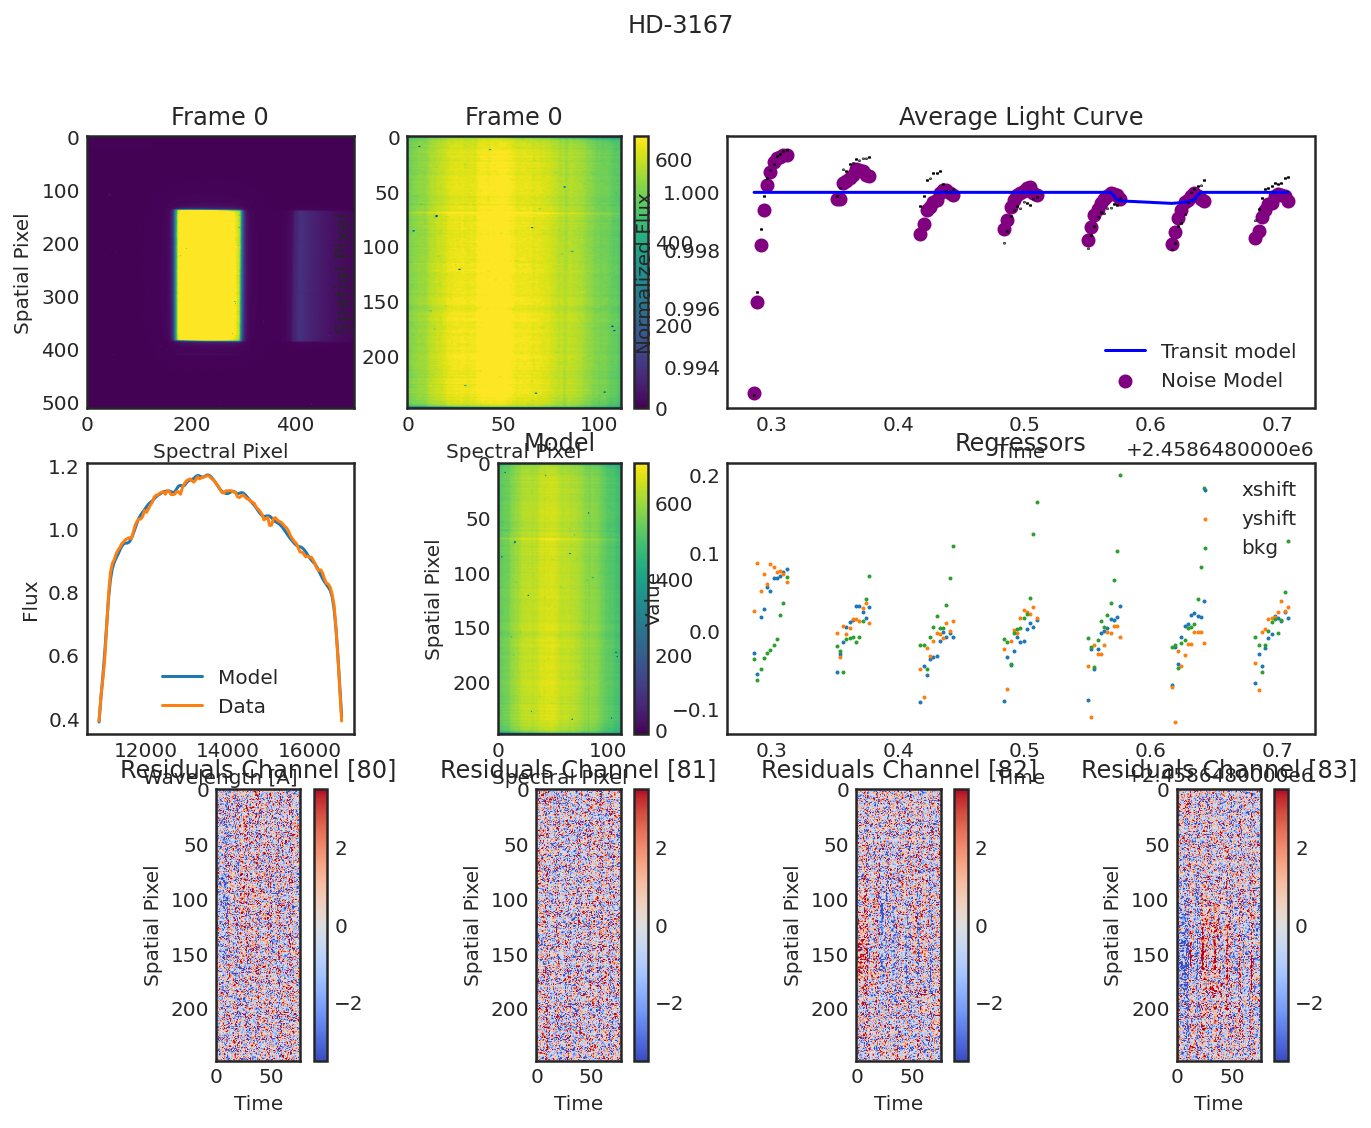

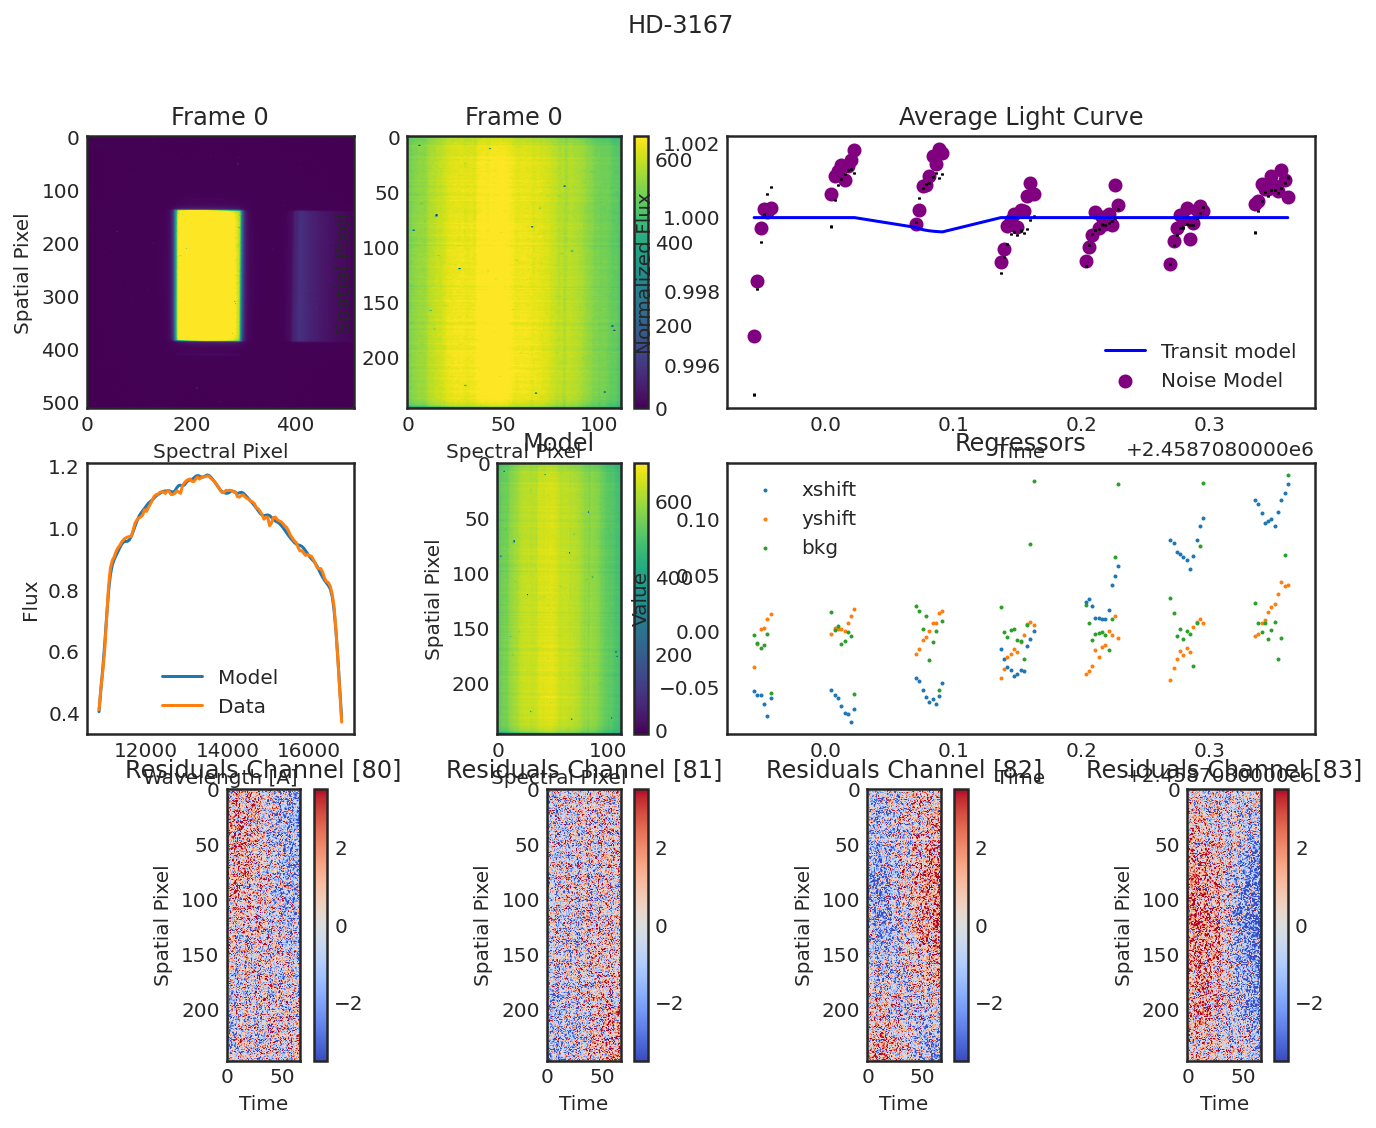

In [15]:
for visit in obs:
    visit.diagnose();
    plt.show();

# Planet c?

In [16]:
obs = om.Observation.from_files(fnames, planet_letter='c')

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

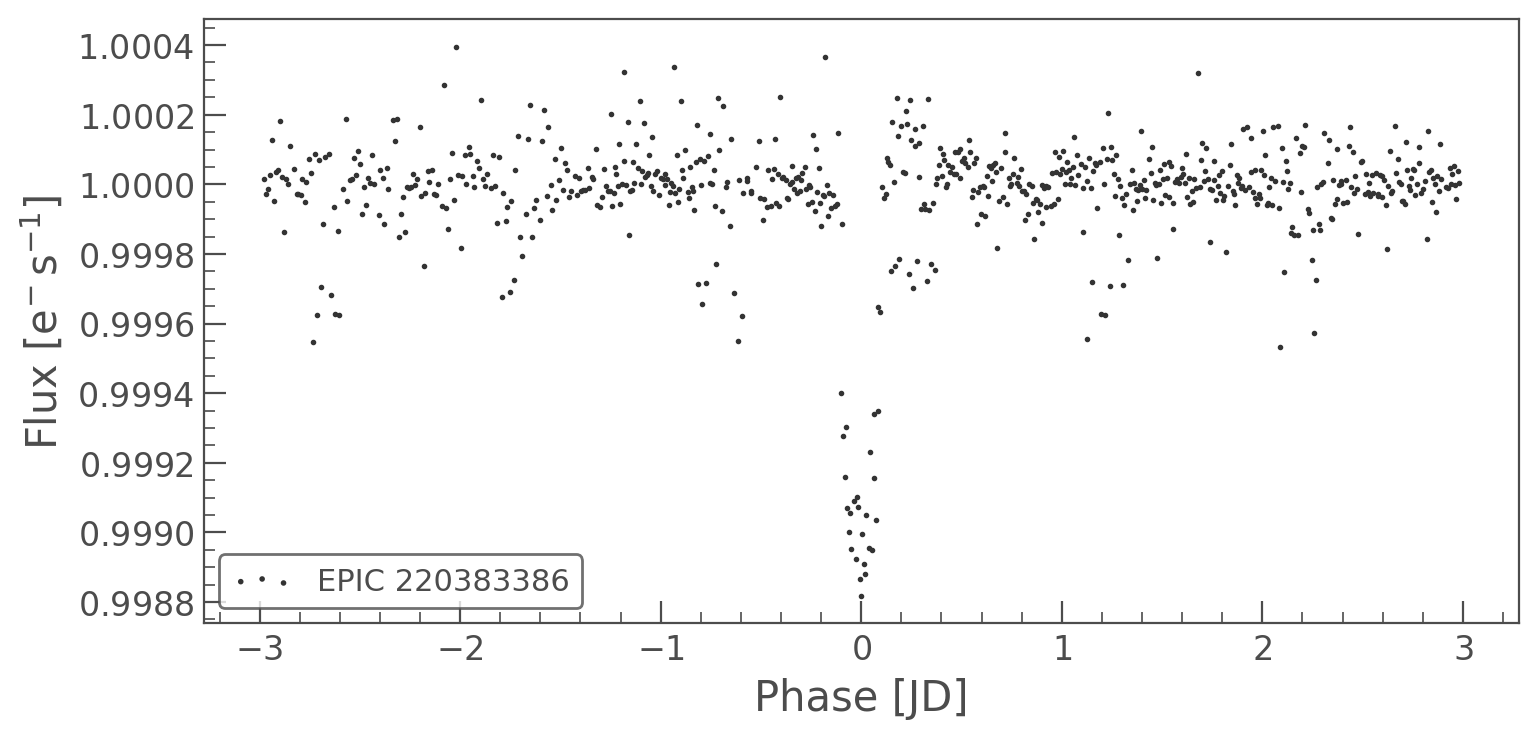

In [17]:
k = np.abs(((clc.time.value - (obs.t0 - 2454833 + obs.period/2))/obs.period) % 1 - 0.5) < 0.1
clc[k].fold(obs.period, obs.t0 - 2454833).scatter()

In [18]:
obs.fit_transit(x_suppl=clc.time.value[k] + 2454833,
                y_suppl=clc.flux.value[k],
                yerr_suppl=clc.flux_err.value[k],
                exptime_suppl=np.median(np.diff(clc.time.value)), fit_t0=True, fit_period=True, fit_inc=True)

<AxesSubplot:xlabel='Phase', ylabel='$e^-s^{-1}$'>

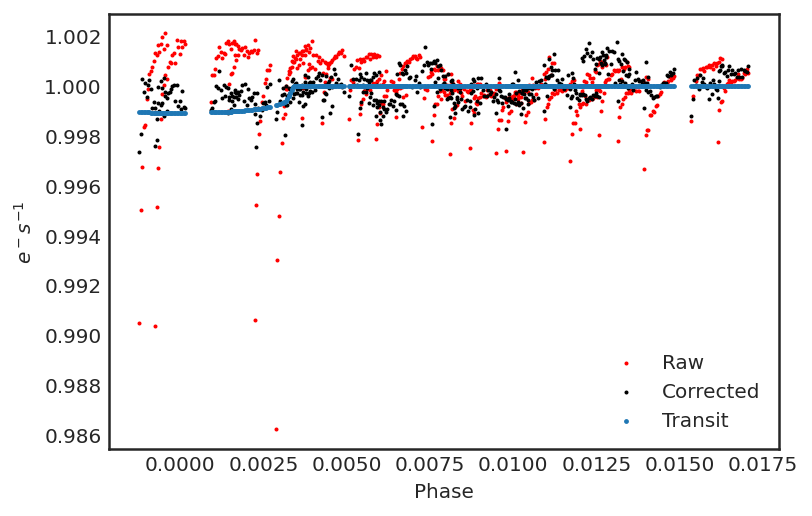

In [19]:
obs.plot()